# SSVEP Classification :

This notebook uses already-implemented functions and classes, presented in "SSVEP1.py"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from SSVEP1 import SsvepLoading,TrialsBuilding,Classify
from estimation import Covariances, huber_param_second_method, huber_param_first_method
from pyriemann.estimation import Covariances as COV

In [2]:
#1. Load data

data_path = 'ssvep_exo/'
subj_list,records = SsvepLoading(data_path)

In [3]:
records

{0: ['subject01_run1', 'subject01_run2'],
 1: ['subject02_run1', 'subject02_run2'],
 2: ['subject03_run1', 'subject03_run2'],
 3: ['subject04_run1', 'subject04_run2'],
 4: ['subject05_run1', 'subject05_run2'],
 5: ['subject06_run1', 'subject06_run2'],
 6: ['subject07_run1', 'subject07_run2', 'subject07_run3'],
 7: ['subject08_run1', 'subject08_run2'],
 8: ['subject09_run1', 'subject09_run2'],
 9: ['subject10_run1', 'subject10_run2', 'subject10_run3', 'subject10_run4'],
 10: ['subject11_run1', 'subject11_run2'],
 11: ['subject12_run1',
  'subject12_run2',
  'subject12_run3',
  'subject12_run4',
  'subject12_run5']}

## Results for each subject : 

### 1. Test different trial duration (tmax-tmin)

In [ ]:
### EXPERIMENT 0 : 4 classes + MDM + nb_trains=total_sessions-1

results =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }
max_results = {'subject' : [], 'tmin' : [] , 'Dt' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }
min_results = {'subject' : [], 'tmin' : [] , 'Dt' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
with_shuffle = False
delta_t = [1,1.5,2,2.5,3,3.5,4,4.5,5]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    for dt in delta_t:
        tmin = 0
        tmax = tmin + dt
        max_score_test = 0
        min_score_test = 1
        
        while (tmax <=5):
            
            TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
            extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
            COVS = Covariances(estimator="scm")
            COVS.fit(extended_trials,labels)
            covs = COVS.transform(extended_trials)
            nb_trains = len(records[subject])-1
            classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
            train_acc,test_acc = classif.accuracies()
            
            if np.mean(test_acc) > max_score_test:
                max_score_test = np.mean(test_acc)
                train_score_max = np.mean(train_acc)
                best_tmin_max = tmin
            
            if np.mean(test_acc) < min_score_test:
                min_score_test = np.mean(test_acc)
                train_score_min = np.mean(train_acc)
                best_tmin_min = tmin
                
                
            results['subject'].append(subject)
            results['tmin'].append(tmin)
            results['tmax'].append(tmax)
            results['freq_band'].append(freq_band)
            results['mean train score'].append(np.mean(train_acc))
            results['mean test score'].append(np.mean(test_acc))
            results['nb all sessions'].append(len(records[subject]))
            results['nb sessions for train'].append(nb_trains)
            results['shuffle sessions'].append(with_shuffle)
            
            tmin += 0.5
            tmax = tmin + dt
            
        max_results['subject'].append(subject)
        max_results['tmin'].append(best_tmin_max)
        max_results['Dt'].append(dt)
        max_results['freq_band'].append(freq_band)
        max_results['mean test score'].append(max_score_test)
        max_results['mean train score'].append(train_score_max)
        max_results['nb all sessions'].append(len(records[subject]))
        max_results['nb sessions for train'].append(nb_trains)
        max_results['shuffle sessions'].append(with_shuffle)
        
        min_results['subject'].append(subject)
        min_results['tmin'].append(best_tmin_min)
        min_results['Dt'].append(dt)
        min_results['freq_band'].append(freq_band)
        min_results['mean test score'].append(min_score_test)
        min_results['mean train score'].append(train_score_min)
        min_results['nb all sessions'].append(len(records[subject]))
        min_results['nb sessions for train'].append(nb_trains)
        min_results['shuffle sessions'].append(with_shuffle)
            
    


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/

Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/

Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 

In [ ]:
df_max = pd.DataFrame(max_results)
df_min = pd.DataFrame(min_results)

In [ ]:
colors = ['b','g','y','black','r','magenta','pink', 'purple','brown','gray','orange','c']
n=0
moy_scores=[]
fig = plt.figure(figsize=(15,8))
for subject in range(len(subj_list)):
    max_score_list= df_max['mean test score'][n:n+len(delta_t)]
    plt.plot(delta_t,max_score_list,label=subj_list[subject], linestyle='-',color=colors[subject])
    n += len(delta_t)
    moy_scores.append(max_score_list)
moy_score = np.asarray(moy_scores).mean(axis=0)
plt.plot(delta_t,moy_score,label="mean", linestyle='--',c="black")
plt.xlabel("tmax-tmin")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy as function of tmax_tmin  \n freq_pass =1 + No shuffle")
plt.legend()
plt.show()

In [ ]:
colors = ['b','g','y','black','r','magenta','pink', 'purple','brown','gray','orange','c']
n=0
fig = plt.figure(figsize=(15,8))
max_moy_scores=[]
min_moy_scores=[]
for subject in range(len(subj_list)):
    max_score_list= df_max['mean test score'][n:n+len(delta_t)]
    min_score_list= df_min['mean test score'][n:n+len(delta_t)]
    max_moy_scores.append(max_score_list)
    min_moy_scores.append(min_score_list)
    plt.plot(delta_t,max_score_list,label=subj_list[subject], linestyle='-',color=colors[subject])
    plt.plot(delta_t,min_score_list,linestyle='-',color=colors[subject])
    n += len(delta_t)

max_moy_score = np.asarray(max_moy_scores).mean(axis=0)
min_moy_score = np.asarray(min_moy_scores).mean(axis=0)

plt.plot(delta_t,min_moy_score,linestyle='-.',label="mean",c="black")
plt.plot(delta_t,max_moy_score,linestyle='-.',c="black")

plt.xlabel("tmax-tmin")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy as function of tmax_tmin (max and min possible score) \n freq_pass =1 + No shuffle")
plt.legend()
plt.show()
    

### 2.Test different frequency bands

In [9]:
## EXPERIMENT 0 : 4 classes + MDM + nb_trains=total_sessions-1

results1 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin =0.5
tmax=5
with_shuffle = False
freq_bands = [0.1,0.25,0.5,0.75,0.9,1,1.1,1.5]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    for freq_band in freq_bands:

        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        COVS = Covariances(estimator="scm")
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        nb_trains = len(records[subject])-1
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc,test_acc = classif.accuracies()

        results1['subject'].append(subject)
        results1['tmin'].append(tmin)
        results1['tmax'].append(tmax)
        results1['freq_band'].append(freq_band)
        results1['mean train score'].append(np.mean(train_acc))
        results1['mean test score'].append(np.mean(test_acc))
        results1['nb all sessions'].append(len(records[subject]))
        results1['nb sessions for train'].append(nb_trains)
        results1['shuffle sessions'].append(with_shuffle)
            

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =   

Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject09 --------------
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.6

Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [

Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  

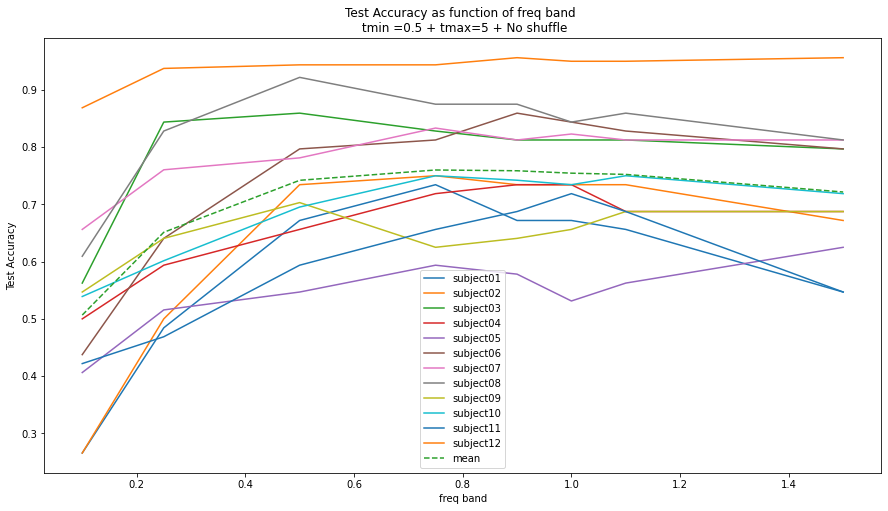

In [10]:
df1 = pd.DataFrame(results1)
fig = plt.figure(figsize=(15,8))
n =0
moy_scores = []
for subject in range(len(subj_list)):
    score_list= df1['mean test score'][n:n+len(freq_bands)]
    moy_scores.append(score_list)
    plt.plot(freq_bands,score_list,label=subj_list[subject])
    n +=len(freq_bands)
moy_score = np.asarray(moy_scores).mean(axis=0)
plt.plot(freq_bands,moy_score,label="mean",linestyle='--')
plt.xlabel("freq band")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy as function of freq band \n tmin =0.5 + tmax=5 + No shuffle")
plt.legend()
plt.show()
    

### 3. Search the best combinaison : tmin, tmax, freq_band

In [4]:
## EXPERIMENT 0 : 4 classes + MDM + nb_trains=total_sessions-1

results0 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
with_shuffle = False
delta_t = [2,2.5,3,3.5,4,4.5,5]
freq_bands = [0.5,0.8,1,1.1,1.5]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    for freq_band in freq_bands :
        for dt in delta_t:
            tmin = 0
            tmax = tmin + dt
           
            while (tmax <=5):

                TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
                extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
                COVS = Covariances(estimator="scm")
                COVS.fit(extended_trials,labels)
                covs = COVS.transform(extended_trials)
                nb_trains = len(records[subject])-1
                classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
                train_acc,test_acc = classif.accuracies()

                results0['subject'].append(subject)
                results0['tmin'].append(tmin)
                results0['tmax'].append(tmax)
                results0['freq_band'].append(freq_band)
                results0['mean train score'].append(np.mean(train_acc))
                results0['mean test score'].append(np.mean(test_acc))
                results0['nb all sessions'].append(len(records[subject]))
                results0['nb sessions for train'].append(nb_trains)
                results0['shuffle sessions'].append(with_shuffle)

                tmin += 0.5
                tmax = tmin + dt
            
       

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =   

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 

Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/

Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =      0.000 ...   229.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run2_raw.fif...
Isotrak not found
    Range : 0 ... 68575 =      0.000 ...   267.871 secs
Ready.
Reading 0 ... 68575  =      0.000 ...   267.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject05/subject05_run1_raw.fif...
Isotrak not found
    Range : 0 ... 58847 =      0.000 ...   229.871 secs
Ready.
Reading 0 ... 58847  =   

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 

Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/

Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run2_raw.fif...
Isotrak not found
    Range : 0 ... 55199 =      0.000 ...   215.621 secs
Ready.
Reading 0 ... 55199  =      0.000 ...   215.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject07/subject07_run3_raw.fif...
Isotrak not found
    Range : 0 ... 82751 =      0.000 ...   323.246 secs
Ready.
Reading 0 ... 82751  =      0.000 ...   323.246 secs...
32 events found
Event IDs: [1 2 

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =   

Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75391 =      0.000 ...   294.496 secs
Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject09 --------------
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.7

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 

Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_ex

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run1_raw.fif...
Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75455 =      0.000 ...   294.746 secs
Ready.
Reading 0 ... 75455  =   

Ready.
Reading 0 ... 75455  =      0.000 ...   294.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject11/subject11_run2_raw.fif...
Isotrak not found
    Range : 0 ... 76415 =      0.000 ...   298.496 secs
Ready.
Reading 0 ... 76415  =      0.000 ...   298.496 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject12 --------------
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.3

Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range 

Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 

Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range 

In [10]:
df0 = pd.DataFrame(results0)
combs = []
tmins = [0.5*i for i in range(10)]
tmaxes = [0.5*(i+1) for i in range(10)]
moy_scores = {(tmin,tmax,freq_band):[] for tmin in tmins for tmax in tmaxes for freq_band in freq_bands }


for i in range(len(df0)):
    for freq_band in freq_bands :
        for tmin in tmins:
            for tmax in tmaxes:
                if (df0['tmin'][i]==tmin) and (df0['tmax'][i]==tmax) and (df0['freq_band'][i]==freq_band):
                    moy_scores[(tmin,tmax,freq_band)].append(df0['mean test score'][i])
means=[]
means_keys=[]
for k in moy_scores.keys():
    if moy_scores[k] !=[]:
        moy_score = np.asarray(moy_scores[k]).mean(axis=0)
        means.append(moy_score)
        means_keys.append(k)
sorted_zip_means = sorted(zip(means,means_keys))
sorted_means,sorted_means_keys=[[i for (i,j) in sorted_zip_means],[j for (i,j) in sorted_zip_means]]
print(" Best mean scores = ", sorted_means[-5:])
print(" Best combinaisons = ",sorted_means_keys[-5:])

 Best mean scores =  [0.7475260416666667, 0.7506510416666666, 0.7507378472222221, 0.75234375, 0.7545138888888888]
 Best combinaisons =  [(0.0, 5.0, 0.8), (0.5, 4.5, 1), (0.5, 5.0, 0.8), (0.5, 5.0, 1.1), (0.5, 5.0, 1)]


###  4. Test different train/test samples number

In [11]:
results2 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin =0.5
tmax=5
freq_band =1
train_props = [0.25,0.5,0.6,0.75,0.8,0.9]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    for train_prop in train_props:

        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        COVS = Covariances(estimator="scm")
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        nb_trains = 0
        classif = Classify(method,covs,labels,nb_trains,nb_classes,train_prop=train_prop,kfold=100)
        train_acc,test_acc = classif.accuracies()

        results2['subject'].append(subject)
        results2['tmin'].append(tmin)
        results2['tmax'].append(tmax)
        results2['freq_band'].append(freq_band)
        results2['mean train score'].append(np.mean(train_acc))
        results2['mean test score'].append(np.mean(test_acc))
        results2['nb all sessions'].append(len(records[subject]))
        results2['nb sessions for train'].append(nb_trains)
        results2['shuffle sessions'].append(with_shuffle)
            

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1

Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63039 =      0.000 ...   246.246 secs
Ready.
Reading 0 ... 63039  =      0.000 ...   246.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject04 --------------
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.1

Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run2_raw.fif...
Isotrak not found
    Range : 0 ... 64543 =      0.000 ...   252.121 secs
Ready.
Reading 0 ... 64543  =      0.000 ...   252.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject06/subject06_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75295 =      0.000 ...   294.121 secs
Ready.
Reading 0 ... 75295  =      0.000 ...   294.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/

Ready.
Reading 0 ... 75391  =      0.000 ...   294.496 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject08/subject08_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75967 =      0.000 ...   296.746 secs
Ready.
Reading 0 ... 75967  =      0.000 ...   296.746 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject09 --------------
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.621 secs
Ready.
Reading 0 ... 75935  =      0.000 ...   296.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75711 =      0.000 ...   295.746 secs
Ready.
Reading 0 ... 75711  =      0.000 ...   295.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject09/subject09_run1_raw.fif...
Isotrak not found
    Range : 0 ... 75935 =      0.000 ...   296.6

Isotrak not found
    Range : 0 ... 110239 =      0.000 ...   430.621 secs
Ready.
Reading 0 ... 110239  =      0.000 ...   430.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run2_raw.fif...
Isotrak not found
    Range : 0 ... 75583 =      0.000 ...   295.246 secs
Ready.
Reading 0 ... 75583  =      0.000 ...   295.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run3_raw.fif...
Isotrak not found
    Range : 0 ... 78239 =      0.000 ...   305.621 secs
Ready.
Reading 0 ... 78239  =      0.000 ...   305.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject10/subject10_run4_raw.fif...
Isotrak not found
    Range : 0 ... 76895 =      0.000 ...   300.371 secs
Ready.
Reading 0 ... 76895  =      0.000 ...   300.371 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject11 --------------
Opening raw data file ssvep_exo/subject11/subject11_run1_r

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run1_raw.fif...
Isotrak not found
    Range : 0 ... 90527 =      0.000 ...   353.621 secs
Ready.
Reading 0 ... 90527  =      0.000 ...   353.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run2_raw.fif...
Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [

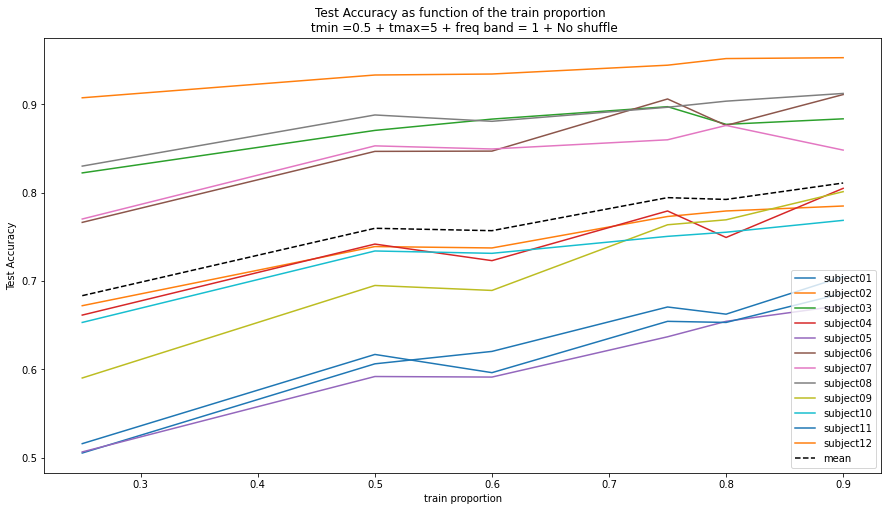

In [12]:
df2 = pd.DataFrame(results2)
fig = plt.figure(figsize=(15,8))
n =0
moy_scores = []
for subject in range(len(subj_list)):
    score_list= df2['mean test score'][n:n+len(train_props)]
    moy_scores.append(score_list)
    plt.plot(train_props,score_list,label=subj_list[subject])
    n +=len(train_props)
moy_score = np.asarray(moy_scores).mean(axis=0)
plt.plot(train_props,moy_score,label="mean",linestyle='--',c="black")
plt.xlabel("train proportion")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy as function of the train proportion \n tmin =0.5 + tmax=5 + freq band = 1 + No shuffle")
plt.legend()
plt.show()
    

### 5.Compare different organizations of the training set : no shuffle/ with shuffle/ split

In [ ]:
## EXPERIMENT 1 : 4 classes + MDM + nb_trains=total_sessions-1

results_no_schuffle =  []
results_with_schuffle =  []
results_split = []

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=0.5,tmax=5,freq_band=1)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    COVS = Covariances(estimator="scm")
    COVS.fit(extended_trials,labels)
    covs = COVS.transform(extended_trials)
    nb_trains = len(records[subject])-1
    print("nb_trains = ",nb_trains," over ",len(records[subject])," sessions")
    classif1 = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = False)
    train_acc1,test_acc1 = classif1.accuracies()
    
    n_tries = 100
    all_train_acc2 = []
    all_test_acc2 = []
    for _ in range(n_tries):
        classif2 = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = True)
        train_acc2,test_acc2 = classif2.accuracies()
        all_train_acc2.append(train_acc2)
        all_test_acc2.append(test_acc2)
    mean_train_acc2 = np.mean(np.asarray(all_train_acc2),axis = 1)
    mean_test_acc2  = np.mean(np.asarray(all_test_acc2),axis = 1)
   
    classif3 = Classify(method,covs,labels,0,nb_classes,train_prop=nb_trains/(nb_trains+1),kfold=100)
    train_acc3,test_acc3 = classif3.accuracies()
    
    results_no_schuffle.append([train_acc1,test_acc1])
    results_with_schuffle.append([mean_train_acc2,mean_test_acc2])
    results_split.append([train_acc3,test_acc3])
    
    print()

In [ ]:
all_results = {'subject':[],'test score':[],'method':[]}

moy1 = 0
moy2 = 0
moy3 = 0
for i in range(len(results_no_schuffle)):
    all_results['subject'].append(i+1)
    all_results['method'].append("No shuffle")
    all_results['test score'].append(np.mean(results_no_schuffle[i][1]))
    
    all_results['subject'].append(i+1)
    all_results['method'].append("With shuffle")
    all_results['test score'].append(np.mean(results_with_schuffle[i][1]))
    
    all_results['subject'].append(i+1)
    all_results['method'].append("Split")
    all_results['test score'].append(np.mean(results_split[i][1]))
   
    moy1 += np.mean(results_no_schuffle[i][1])/12
    moy2 += np.mean(results_with_schuffle[i][1])/12
    moy3 += np.mean(results_split[i][1])/12

print("Mean for no shuffle   = ",moy1)
print("Mean for with shuffle = ",moy2)
print("Mean for split        = ",moy3)

all_df = pd.DataFrame(all_results)
plt.figure(figsize=(20,10))
sns.barplot(data=all_df, y="test score", x="subject", hue="method")
plt.show()

### 6.Set the classification for 3 classes instead of 4

In [16]:
## EXPERIMENT 1 : 4 classes + MDM + nb_trains=total_sessions-1

results00 =  []
nb_classes = 3 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=0.5,tmax=5,freq_band=1)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    COVS = Covariances(estimator="scm")
    COVS.fit(extended_trials,labels)
    covs = COVS.transform(extended_trials)
    nb_trains = len(records[subject])-1
    print("nb_trains = ",nb_trains," over ",len(records[subject])," sessions")
    classif = Classify(method,covs,labels,nb_trains,nb_classes)
    train_acc,test_acc = classif.accuracies()
    print("Training Accuracy = ",round(100*np.mean(train_acc),2),"%  [+/- ",round(100*np.std(train_acc),2),"% ]")
    print("Testing  Accuracy = ",round(100*np.mean(test_acc),2),"%  [+/- ",round(100*np.std(test_acc),2),"% ]")
    
    results00.append(test_acc)
    
    print()

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
nb_trains =  1  over  2  sessions
Training Accuracy =  100.0 %  [+/-  0.0 % ]
Testing  Accuracy =  75.0 %  [+/-  4.17 % ]

-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Iso

Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
nb_trains =  4  over  5  sessions
Training Accuracy =  99.79 %  [+/-  0.42 % ]
Testing  Accuracy

In [19]:
print("***Testing Accuracies***")
for i in range(len(results00)):
    print( "- Subject",i+1," = ", np.mean(results00[i]))

***Testing Accuracies***
- Subject 1  =  0.75
- Subject 2  =  0.5833333333333333
- Subject 3  =  0.8541666666666666
- Subject 4  =  0.7708333333333334
- Subject 5  =  0.625
- Subject 6  =  0.7708333333333333
- Subject 7  =  0.9027777777777778
- Subject 8  =  0.9166666666666666
- Subject 9  =  0.7291666666666666
- Subject 10  =  0.7604166666666667
- Subject 11  =  0.5833333333333334
- Subject 12  =  0.9833333333333332


In [10]:
## EXPERIMENT 2 : 4 classes + MDM + nb_trains=total_sessions-1 + estimator = lwf

results02 =  []
nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=2,tmax=5,freq_band=1)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    covs = COV(estimator="lwf").transform(extended_trials)# for all sessions of the chosen subject
    nb_trains = len(records[subject])-1
    print("nb_trains = ",nb_trains," over ",len(records[subject])," sessions")
    classif = Classify(method,covs,labels,nb_trains,nb_classes)
    train_acc,test_acc = classif.accuracies()
    print("Training Accuracy = ",round(100*np.mean(train_acc),2),"%  [+/- ",round(100*np.std(train_acc),2),"% ]")
    print("Testing  Accuracy = ",round(100*np.mean(test_acc),2),"%  [+/- ",round(100*np.std(test_acc),2),"% ]")
    
    results02.append(test_acc)
    
    print()

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
nb_trains =  1  over  2  sessions
Training Accuracy =  100.0 %  [+/-  0.0 % ]
Testing  Accuracy =  68.75 %  [+/-  6.25 % ]

-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Is

Isotrak not found
    Range : 0 ... 92383 =      0.000 ...   360.871 secs
Ready.
Reading 0 ... 92383  =      0.000 ...   360.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run3_raw.fif...
Isotrak not found
    Range : 0 ... 89695 =      0.000 ...   350.371 secs
Ready.
Reading 0 ... 89695  =      0.000 ...   350.371 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
nb_trains =  4  over  5  sessions
Training Accuracy =  97.97 %  [+/-  1.06 % ]
Testing  Accuracy

In [11]:
print("***Testing Accuracies***")
for i in range(len(results02)):
    print( "- Subject",i+1," = ", np.mean(results02[i]))

***Testing Accuracies***
- Subject 1  =  0.6875
- Subject 2  =  0.65625
- Subject 3  =  0.8125
- Subject 4  =  0.765625
- Subject 5  =  0.5
- Subject 6  =  0.84375
- Subject 7  =  0.75
- Subject 8  =  0.828125
- Subject 9  =  0.578125
- Subject 10  =  0.6015625
- Subject 11  =  0.5
- Subject 12  =  0.91875


### 7 . Compare estimators

##### 7.1 - Without shuffling

In [4]:
## EXPERIMENT 0 : 4 classes + MDM + nb_trains=total_sessions-1

results11 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin =0.5
tmax=5
with_shuffle = False
freq_band = 1
estimators = ["scm","tyler","huber"]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    nb_trains = len(records[subject])-1
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc,test_acc = classif.accuracies()

        results11['subject'].append(subject)
        results11['tmin'].append(tmin)
        results11['tmax'].append(tmax)
        results11['freq_band'].append(freq_band)
        results11['mean train score'].append(np.mean(train_acc))
        results11['mean test score'].append(np.mean(test_acc))
        results11['nb all sessions'].append(len(records[subject]))
        results11['nb sessions for train'].append(nb_trains)
        results11['shuffle sessions'].append(with_shuffle)
        results11['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

In [ ]:
df11 = pd.DataFrame(results11)

In [ ]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df11['mean test score'][3*i],4), ' | ',round(df11['mean test score'][3*i+1],4),
          ' | ',round(df11['mean test score'][3*i+2],4))
    scm_mean += df11['mean test score'][3*i]/12
    tyler_mean += df11['mean test score'][3*i+1]/12
    huber_mean += df11['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

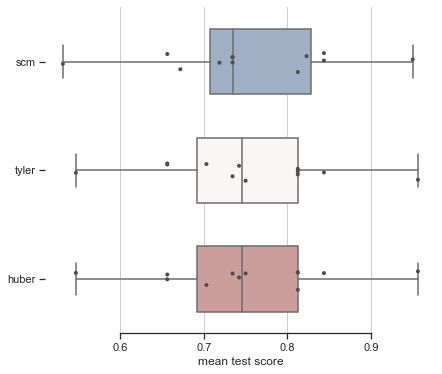

In [51]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df11, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df11,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


##### 7.2 - With shuffling

In [5]:
results12 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin =0.5
tmax=5
with_shuffle = True
freq_band = 1
estimators = ["scm","tyler","huber"]
n_tries = 50

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    nb_trains = len(records[subject])-1
    for estimator in estimators:
        COVS = Covariances(estimator=estimator,param=1.35)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        mean_test_acc  = 0
        mean_train_acc = 0
        for i in range(n_tries):
            classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
            train_acc,test_acc = classif.accuracies()
            mean_train_acc += np.mean(train_acc)/n_tries
            mean_test_acc  += np.mean(test_acc)/n_tries

        results12['subject'].append(subject)
        results12['tmin'].append(tmin)
        results12['tmax'].append(tmax)
        results12['freq_band'].append(freq_band)
        results12['mean train score'].append(np.mean(mean_train_acc))
        results12['mean test score'].append(np.mean(mean_test_acc))
        results12['nb all sessions'].append(len(records[subject]))
        results12['nb sessions for train'].append(nb_trains)
        results12['shuffle sessions'].append(with_shuffle)
        results12['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

In [38]:
df12 = pd.DataFrame(results12)

In [39]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df12['mean test score'][3*i],4), ' | ',round(df12['mean test score'][3*i+1],4),
          ' | ',round(df12['mean test score'][3*i+2],4))
    scm_mean += df12['mean test score'][3*i]/12
    tyler_mean += df12['mean test score'][3*i+1]/12
    huber_mean += df12['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.6147  |  0.5863  |  0.6094
- Subject 2  =  0.7416  |  0.7447  |  0.7631
- Subject 3  =  0.8775  |  0.8822  |  0.8825
- Subject 4  =  0.7384  |  0.7234  |  0.7344
- Subject 5  =  0.5838  |  0.5775  |  0.5753
- Subject 6  =  0.8419  |  0.8553  |  0.8525
- Subject 7  =  0.8615  |  0.861  |  0.865
- Subject 8  =  0.8794  |  0.8803  |  0.8769
- Subject 9  =  0.6963  |  0.6941  |  0.6988
- Subject 10  =  0.7581  |  0.7644  |  0.7698
- Subject 11  =  0.6012  |  0.6178  |  0.6209
- Subject 12  =  0.9512  |  0.955  |  0.9565
- mean      =  0.7621  |  0.7618  |  0.7671


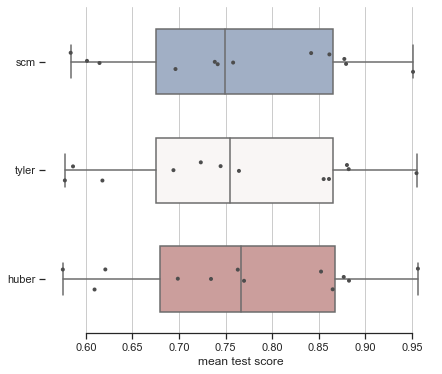

In [47]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df12, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df12,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


#### 7.3 With split : take $75 \%$ of samples for train

In [33]:
results13 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin =0.5
tmax=5
with_shuffle = False
freq_band = 1
train_prop = 0.75
estimators = ["scm","tyler","huber"]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    #nb_trains = len(records[subject])-1
    nb_trains = 0
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle,train_prop=train_prop,kfold=100)
        train_acc,test_acc = classif.accuracies()

        results13['subject'].append(subject)
        results13['tmin'].append(tmin)
        results13['tmax'].append(tmax)
        results13['freq_band'].append(freq_band)
        results13['mean train score'].append(np.mean(train_acc))
        results13['mean test score'].append(np.mean(test_acc))
        results13['nb all sessions'].append(len(records[subject]))
        results13['nb sessions for train'].append(nb_trains)
        results13['shuffle sessions'].append(with_shuffle)
        results13['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.2

In [34]:
df13 = pd.DataFrame(results13)

In [35]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df13['mean test score'][3*i],4), ' | ',round(df13['mean test score'][3*i+1],4),
          ' | ',round(df11['mean test score'][3*i+2],4))
    scm_mean += df13['mean test score'][3*i]/12
    tyler_mean += df13['mean test score'][3*i+1]/12
    huber_mean += df13['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.6719  |  0.655  |  0.6406
- Subject 2  =  0.78  |  0.7887  |  0.6719
- Subject 3  =  0.8812  |  0.8844  |  0.8438
- Subject 4  =  0.7581  |  0.7744  |  0.75
- Subject 5  =  0.6712  |  0.6319  |  0.5
- Subject 6  =  0.885  |  0.8894  |  0.8438
- Subject 7  =  0.8675  |  0.8538  |  0.7292
- Subject 8  =  0.8988  |  0.9031  |  0.8125
- Subject 9  =  0.7494  |  0.755  |  0.5156
- Subject 10  =  0.7716  |  0.7672  |  0.6406
- Subject 11  =  0.6544  |  0.6738  |  0.5625
- Subject 12  =  0.9407  |  0.9532  |  0.9188
- mean      =  0.7942  |  0.7942  |  0.7943


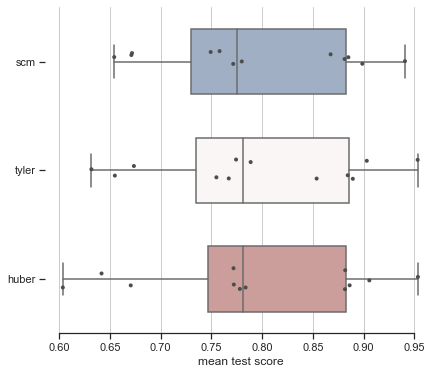

In [46]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df13, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df13,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


#### 7.4- with split: take $25 \%$ of samples for train

In [41]:
results14 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin =0.5
tmax=5
with_shuffle = False
freq_band = 1
train_prop = 0.25
estimators = ["scm","tyler","huber"]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    #nb_trains = len(records[subject])-1
    nb_trains = 0
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle,train_prop=train_prop,kfold=100)
        train_acc,test_acc = classif.accuracies()

        results14['subject'].append(subject)
        results14['tmin'].append(tmin)
        results14['tmax'].append(tmax)
        results14['freq_band'].append(freq_band)
        results14['mean train score'].append(np.mean(train_acc))
        results14['mean test score'].append(np.mean(test_acc))
        results14['nb all sessions'].append(len(records[subject]))
        results14['nb sessions for train'].append(nb_trains)
        results14['shuffle sessions'].append(with_shuffle)
        results14['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.2

In [42]:
df14 = pd.DataFrame(results14)

In [44]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df14['mean test score'][3*i],4), ' | ',round(df14['mean test score'][3*i+1],4),
          ' | ',round(df14['mean test score'][3*i+2],4))
    scm_mean += df14['mean test score'][3*i]/12
    tyler_mean += df14['mean test score'][3*i+1]/12
    huber_mean += df14['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.5079  |  0.5008  |  0.4942
- Subject 2  =  0.6704  |  0.6706  |  0.68
- Subject 3  =  0.8392  |  0.841  |  0.8358
- Subject 4  =  0.659  |  0.6627  |  0.6746
- Subject 5  =  0.5073  |  0.5035  |  0.4921
- Subject 6  =  0.7692  |  0.7721  |  0.7725
- Subject 7  =  0.7699  |  0.7831  |  0.7739
- Subject 8  =  0.8294  |  0.8267  |  0.8352
- Subject 9  =  0.5965  |  0.5967  |  0.6012
- Subject 10  =  0.6448  |  0.649  |  0.6643
- Subject 11  =  0.521  |  0.5208  |  0.529
- Subject 12  =  0.8996  |  0.9014  |  0.9046
- mean      =  0.6845  |  0.6857  |  0.6881


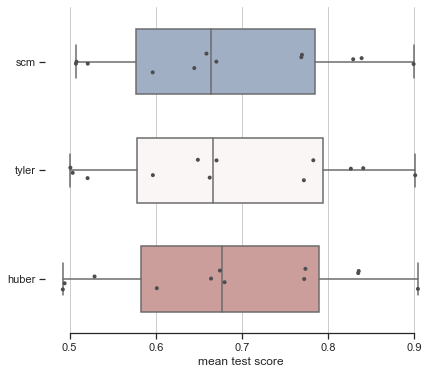

In [45]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df14, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df14,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


#### 7.5- Without shuffling + tmin = 2

In [52]:
## EXPERIMENT 0 : 4 classes + MDM + nb_trains=total_sessions-1

results15 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin = 2
tmax=5
with_shuffle = False
freq_band = 1
estimators = ["scm","tyler","huber"]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    nb_trains = len(records[subject])-1
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc,test_acc = classif.accuracies()

        results15['subject'].append(subject)
        results15['tmin'].append(tmin)
        results15['tmax'].append(tmax)
        results15['freq_band'].append(freq_band)
        results15['mean train score'].append(np.mean(train_acc))
        results15['mean test score'].append(np.mean(test_acc))
        results15['nb all sessions'].append(len(records[subject]))
        results15['nb sessions for train'].append(nb_trains)
        results15['shuffle sessions'].append(with_shuffle)
        results15['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.2

In [53]:
df15 = pd.DataFrame(results15)

In [54]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df15['mean test score'][3*i],4), ' | ',round(df15['mean test score'][3*i+1],4),
          ' | ',round(df15['mean test score'][3*i+2],4))
    scm_mean += df15['mean test score'][3*i]/12
    tyler_mean += df15['mean test score'][3*i+1]/12
    huber_mean += df15['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.625  |  0.6406  |  0.6406
- Subject 2  =  0.6562  |  0.6719  |  0.6719
- Subject 3  =  0.8281  |  0.8438  |  0.8438
- Subject 4  =  0.7344  |  0.75  |  0.75
- Subject 5  =  0.4844  |  0.5  |  0.5
- Subject 6  =  0.8281  |  0.8438  |  0.8438
- Subject 7  =  0.75  |  0.7292  |  0.7292
- Subject 8  =  0.7812  |  0.8125  |  0.8125
- Subject 9  =  0.5781  |  0.5156  |  0.5156
- Subject 10  =  0.6094  |  0.6406  |  0.6406
- Subject 11  =  0.5469  |  0.5625  |  0.5625
- Subject 12  =  0.925  |  0.9188  |  0.9188
- mean      =  0.6956  |  0.7024  |  0.7024


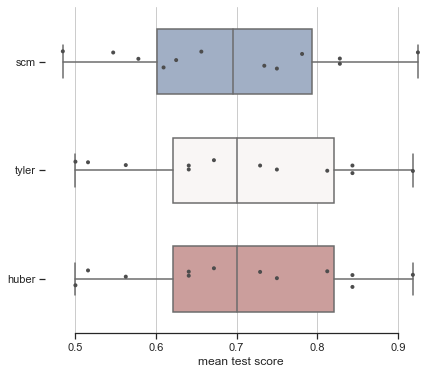

In [55]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df15, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df15,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


#### 7.6- With shuffling + tmin=2

In [56]:
results16 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin = 2
tmax=5
with_shuffle = True
freq_band = 1
estimators = ["scm","tyler","huber"]
n_tries = 50

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    nb_trains = len(records[subject])-1
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        mean_test_acc  = 0
        mean_train_acc = 0
        for i in range(n_tries):
            classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
            train_acc,test_acc = classif.accuracies()
            mean_train_acc += np.mean(train_acc)/n_tries
            mean_test_acc  += np.mean(test_acc)/n_tries

        results16['subject'].append(subject)
        results16['tmin'].append(tmin)
        results16['tmax'].append(tmax)
        results16['freq_band'].append(freq_band)
        results16['mean train score'].append(np.mean(mean_train_acc))
        results16['mean test score'].append(np.mean(mean_test_acc))
        results16['nb all sessions'].append(len(records[subject]))
        results16['nb sessions for train'].append(nb_trains)
        results16['shuffle sessions'].append(with_shuffle)
        results16['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.2

In [57]:
df16 = pd.DataFrame(results16)

In [58]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df16['mean test score'][3*i],4), ' | ',round(df16['mean test score'][3*i+1],4),
          ' | ',round(df16['mean test score'][3*i+2],4))
    scm_mean += df16['mean test score'][3*i]/12
    tyler_mean += df16['mean test score'][3*i+1]/12
    huber_mean += df16['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.5522  |  0.5612  |  0.5719
- Subject 2  =  0.7266  |  0.7344  |  0.7309
- Subject 3  =  0.8728  |  0.8688  |  0.87
- Subject 4  =  0.7394  |  0.7375  |  0.7463
- Subject 5  =  0.5462  |  0.5322  |  0.5225
- Subject 6  =  0.8172  |  0.8253  |  0.8206
- Subject 7  =  0.8656  |  0.876  |  0.8665
- Subject 8  =  0.7663  |  0.7656  |  0.7647
- Subject 9  =  0.5481  |  0.5331  |  0.56
- Subject 10  =  0.6383  |  0.6455  |  0.6503
- Subject 11  =  0.5128  |  0.5156  |  0.5184
- Subject 12  =  0.9167  |  0.9157  |  0.9145
- mean      =  0.7085  |  0.7093  |  0.7114


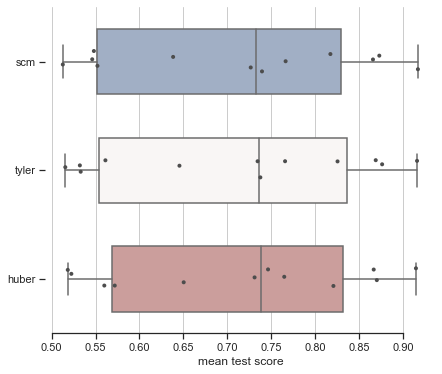

In [59]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df16, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df16,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


#### 7.7 - with split: take $75\%$ of samples for train +tmin = 2

In [60]:
results17 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin = 2
tmax=5
with_shuffle = False
freq_band = 1
train_prop = 0.75
estimators = ["scm","tyler","huber"]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    #nb_trains = len(records[subject])-1
    nb_trains = 0
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle,train_prop=train_prop,kfold=100)
        train_acc,test_acc = classif.accuracies()

        results17['subject'].append(subject)
        results17['tmin'].append(tmin)
        results17['tmax'].append(tmax)
        results17['freq_band'].append(freq_band)
        results17['mean train score'].append(np.mean(train_acc))
        results17['mean test score'].append(np.mean(test_acc))
        results17['nb all sessions'].append(len(records[subject]))
        results17['nb sessions for train'].append(nb_trains)
        results17['shuffle sessions'].append(with_shuffle)
        results17['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.2

In [61]:
df17 = pd.DataFrame(results17)

In [62]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df17['mean test score'][3*i],4), ' | ',round(df17['mean test score'][3*i+1],4),
          ' | ',round(df17['mean test score'][3*i+2],4))
    scm_mean += df17['mean test score'][3*i]/12
    tyler_mean += df17['mean test score'][3*i+1]/12
    huber_mean += df17['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.6131  |  0.6019  |  0.6144
- Subject 2  =  0.7988  |  0.7612  |  0.7738
- Subject 3  =  0.8694  |  0.8675  |  0.8756
- Subject 4  =  0.8019  |  0.7925  |  0.7819
- Subject 5  =  0.5544  |  0.5606  |  0.5756
- Subject 6  =  0.8656  |  0.8631  |  0.8669
- Subject 7  =  0.88  |  0.8742  |  0.8696
- Subject 8  =  0.7856  |  0.8062  |  0.7988
- Subject 9  =  0.6269  |  0.6188  |  0.5919
- Subject 10  =  0.6322  |  0.6462  |  0.6359
- Subject 11  =  0.5769  |  0.5681  |  0.585
- Subject 12  =  0.9175  |  0.9143  |  0.9173
- mean      =  0.7435  |  0.7396  |  0.7405


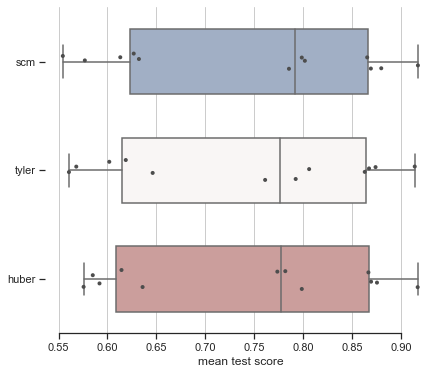

In [63]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df17, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df17,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


#### 7.7 - with split: take $25\%$ of samples for train +tmin = 2

In [4]:
results17 =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] , 'estimator':[],
            'nb all sessions' : [] , 'nb sessions for train' : [] , 'shuffle sessions' : [] }

nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
tmin = 2
tmax=5
with_shuffle = False
freq_band = 1
train_prop = 0.25
estimators = ["scm","tyler","huber"]

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")

    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    #nb_trains = len(records[subject])-1
    nb_trains = 0
    for estimator in estimators:
        COVS = Covariances(estimator=estimator)
        COVS.fit(extended_trials,labels)
        covs = COVS.transform(extended_trials)
        classif = Classify(method,covs,labels,nb_trains,nb_classes,with_shuffle = with_shuffle,train_prop=train_prop,kfold=100)
        train_acc,test_acc = classif.accuracies()

        results17['subject'].append(subject)
        results17['tmin'].append(tmin)
        results17['tmax'].append(tmax)
        results17['freq_band'].append(freq_band)
        results17['mean train score'].append(np.mean(train_acc))
        results17['mean test score'].append(np.mean(test_acc))
        results17['nb all sessions'].append(len(records[subject]))
        results17['nb sessions for train'].append(nb_trains)
        results17['shuffle sessions'].append(with_shuffle)
        results17['estimator'].append(estimator)


-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59455 =      0.000 ...   232.246 secs
Ready.
Reading 0 ... 59455  =      0.000 ...   232.2

In [5]:
df17 = pd.DataFrame(results17)

In [7]:
print("Compare estimators: scm   vs   tyler   vs  huber")
scm_mean , tyler_mean, huber_mean = 0,0,0
for i in range(12):
    print( "- Subject",i+1," = ", round(df17['mean test score'][3*i],4), ' | ',round(df17['mean test score'][3*i+1],4),
          ' | ',round(df17['mean test score'][3*i+2],4))
    scm_mean += df17['mean test score'][3*i]/12
    tyler_mean += df17['mean test score'][3*i+1]/12
    huber_mean += df17['mean test score'][3*i+2]/12
print("- mean      = ",round(scm_mean,4)," | ",round(tyler_mean,4)," | ",round(huber_mean,4))

Compare estimators: scm   vs   tyler   vs  huber
- Subject 1  =  0.4838  |  0.4938  |  0.4923
- Subject 2  =  0.6598  |  0.6533  |  0.6648
- Subject 3  =  0.821  |  0.8248  |  0.8219
- Subject 4  =  0.6554  |  0.6767  |  0.675
- Subject 5  =  0.4692  |  0.4444  |  0.451
- Subject 6  =  0.7187  |  0.7246  |  0.7271
- Subject 7  =  0.7394  |  0.7494  |  0.741
- Subject 8  =  0.709  |  0.7081  |  0.7135
- Subject 9  =  0.4829  |  0.4788  |  0.4806
- Subject 10  =  0.5119  |  0.5139  |  0.512
- Subject 11  =  0.4423  |  0.441  |  0.4619
- Subject 12  =  0.8603  |  0.8627  |  0.8556
- mean      =  0.6295  |  0.631  |  0.6331


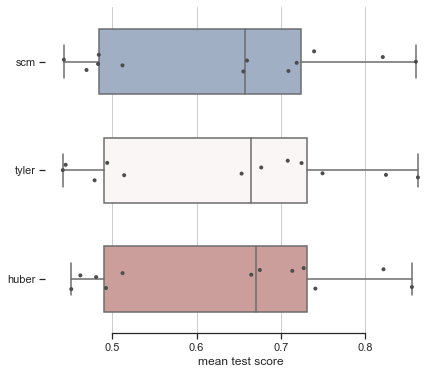

In [8]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Load the example planets dataset

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mean test score", y="estimator", data=df17, width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mean test score", y="estimator", data=df17,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### 8- Robustify MDM

In [4]:
moy=0
nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
robustify = True

for subject in range(len(subj_list)):
    print("--------------",subj_list[subject],"--------------")
    TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=0.5,tmax=5,freq_band=1)
    extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
    COVS = Covariances(estimator="scm")
    COVS.fit(extended_trials,labels)
    covs = COVS.transform(extended_trials)
    nb_trains = len(records[subject])-1
    classif = Classify(method,covs,labels,nb_trains,nb_classes,robustify = robustify)
    train_acc,test_acc = classif.accuracies()
    print("Training Accuracy = ",round(100*np.mean(train_acc),2),"%  [+/- ",round(100*np.std(train_acc),2),"% ]")
    print("Testing  Accuracy = ",round(100*np.mean(test_acc),2),"%  [+/- ",round(100*np.std(test_acc),2),"% ]")
    moy += np.mean(test_acc)/len(subj_list)
    
    print()
print("Mean of test acc = ",round(moy*100,2))

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
Training Accuracy =  70.31 %  [+/-  4.69 % ]
Testing  Accuracy =  42.19 %  [+/-  1.56 % ]

-------------- subject02 --------------
Opening raw data file ssvep_exo/subject02/subject02_run1_raw.fif...
Isotrak not found
    Range : 0 ... 71711 =      0.000 ...   280.121 secs
Ready.
Reading 0 ... 71711  =      0.000 ...   280.121 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject02/subject02_run2_raw.fif...
Isotrak not found
    Range : 0 ...

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run4_raw.fif...
Isotrak not found
    Range : 0 ... 192223 =      0.000 ...   750.871 secs
Ready.
Reading 0 ... 192223  =      0.000 ...   750.871 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject12/subject12_run5_raw.fif...
Isotrak not found
    Range : 0 ... 148543 =      0.000 ...   580.246 secs
Ready.
Reading 0 ... 148543  =      0.000 ...   580.246 secs...
32 events found
Event IDs: [1 2 3 4]
Training Accuracy =  84.53 %  [+/-  2.9 % ]
Testing  Accuracy =  80.62 %  [+/-  7.5 % ]

Mean of test acc =  46.02


## New Experiments

In [4]:
def fill_dict(results,subject,tmin,tmax,freq_band,train_acc,test_acc,nb_trains,estimator):
    results['subject'].append(subject)
    results['tmin'].append(tmin)
    results['tmax'].append(tmax)
    results['freq_band'].append(freq_band)
    results['mean train score'].append(np.mean(train_acc))
    results['mean test score'].append(np.mean(test_acc))
    results['nb all sessions'].append(len(records[subject]))
    results['nb sessions for train'].append(nb_trains)
    results['estimator'].append(estimator)
    return results


In [ ]:
results =  {'subject' : [], 'tmin' : [] , 'tmax' : [], 'freq_band' : [],
           'mean train score' : [] , 'mean test score' : [] ,
            'nb all sessions' : [] , 'nb sessions for train' : [],"estimator":[] }


nb_classes = 4 #if you want to exclude "resting", set nb_classes to 3
method = "MDM"
freq_band = 1
with_shuffle = False
tmax=5
tmins = [0+0.5*i for i in range(5)]# from 0 to 2


for subject in range(len(subj_list)):
    nb_trains = len(records[subject])-1
    print("--------------",subj_list[subject],"--------------")
    for tmin in tmins:
    
        TrialsBuild = TrialsBuilding(data_path,records,subj_list,subject,nb_classes,tmin=tmin,tmax=tmax,freq_band=freq_band)
        extended_trials,labels =TrialsBuild.extended_trials_and_labels_all_sessions() 
        
        
        COVS1 = Covariances(estimator="scm")
        COVS1.fit(extended_trials,labels)
        covs1 = COVS1.transform(extended_trials)
        classif1 = Classify(method,covs1,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc1,test_acc1 = classif1.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc1,test_acc1,nb_trains,"scm")
        print("scm done")
        
        COVS2 = Covariances(estimator="student",ddl=5)
        COVS2.fit(extended_trials,labels)
        covs2 = COVS2.transform(extended_trials)
        classif2 = Classify(method,covs2,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2,test_acc2 = classif2.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc2,test_acc2,nb_trains,"student5")
        print("student5 done")
        
        COVS2bis = Covariances(estimator="student",ddl=3)
        COVS2bis.fit(extended_trials,labels)
        covs2bis = COVS2bis.transform(extended_trials)
        classif2bis = Classify(method,covs2bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc2bis,test_acc2bis = classif2bis.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc2bis,test_acc2bis,nb_trains,"student3")
        print("student3 done")
        
        COVS4 = Covariances(estimator="huber",adaptive=True)
        COVS4.fit(extended_trials,labels)
        covs4 = COVS4.transform(extended_trials)
        classif4 = Classify(method,covs4,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4,test_acc4 = classif4.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc4,test_acc4,nb_trains,"huber adapt")
        print("huber adaptive done")
        
        COVS4bis = Covariances(estimator="huber",adaptive=False)
        COVS4bis.fit(extended_trials,labels)
        covs4bis = COVS4bis.transform(extended_trials)
        classif4bis = Classify(method,covs4bis,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        train_acc4bis,test_acc4bis = classif4bis.accuracies()
        results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc4bis,test_acc4bis,nb_trains,"huber non adapt")
        print("huber non adaptive done")
        
        #COVS3 = Covariances(estimator="tyler",adaptive=True)
        #COVS3.fit(extended_trials,labels)
        #covs3 = COVS3.transform(extended_trials)
        #classif3 = Classify(method,covs3,labels,nb_trains,nb_classes,with_shuffle = with_shuffle)
        #train_acc3,test_acc3 = classif3.accuracies()
        #results = fill_dict(results,subject,tmin,tmax,freq_band,train_acc3,test_acc3,nb_trains,"tyler")
        #print("tyler done")
        
        

        

-------------- subject01 --------------
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Reading 0 ... 78143  =      0.000 ...   305.246 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
Opening raw data file ssvep_exo/subject01/subject01_run1_raw.fif...
Isotrak not found
    Range : 0 ... 57023 =      0.000 ...   222.746 secs
Ready.
Reading 0 ... 57023  =      0.000 ...   222.746 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject01/subject01_run2_raw.fif...
Isotrak not found
    Range : 0 ... 78143 =      0.000 ...   305.246 secs
Ready.
Read

32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject03/subject03_run2_raw.fif...
Isotrak not found
    Range : 0 ... 59039 =      0.000 ...   230.621 secs
Ready.
Reading 0 ... 59039  =      0.000 ...   230.621 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
-------------- subject04 --------------
Opening raw data file ssvep_exo/subject04/subject04_run1_raw.fif...
Isotrak not found
    Range : 0 ... 63647 =      0.000 ...   248.621 secs
Ready.
Reading 0 ... 63647  =      0.000 ...   248.621 secs...
32 events found
Event IDs: [1 2 3 4]
Opening raw data file ssvep_exo/subject04/subject04_run2_raw.fif...
Isotrak not found
    Range : 0 ... 57119 =      0.000 ...   223.121 secs
Ready.
Reading 0 ... 57119  =      0.000 ...   223.121 secs...
32 events found
Event IDs: [1 2 3 4]
scm done
student5 done
student3 done
huber adaptive done
huber non adaptive done
Opening raw data file ssvep_exo/sub

In [ ]:
#plot
df = pd.DataFrame(results)
estimators = ["scm","student5","student3","huber adapt","huber non adapt"]
s = len(tmins)*len(estimators)
fig,axs = plt.subplots(4,3,figsize=(15,15))
axs = axs.flatten()
all_subjects = {(i,k): [] for in in range(len(axs)) for k in range(len(estimators))}
for i in range(len(axs)):
    for k in range(len(estimators)):
        y = [df[6*j+k+s*i]["mean test acc"] for j in range(len(tmins))]
        all_subjects[(i,k)] = y
        axs[i].plot(tmins,y,label = estimators[k])
        axs[i].set_title("subject"+str(i+1))
        axs[i].set_xlabel("tmin")
        axs[i].set_ylabel("Mean test accuracy over sesions")
fig.legend()
        
        

In [ ]:
mean_acc = []
for  k in range(len(estimators)):
    y_k = 0
    for i in range(len(axs)):
        y_k += all_subjects[(i,k)]/len(axs)    
    plt.plot(tmins,y_k,label=estimators[k])
    
plt.title("Mean of all subjects")
plt.xlabel("tmins")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()